In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from fbprophet import Prophet
from fbprophet.plot import plot_weekly
from matplotlib import pyplot
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error, mean_absolute_error
import locale
import datetime
import os
os.environ['NUMEXPR_MAX_THREADS'] = '12'


ascii_cup ="""\
    (  )   (   )  )
     ) (   )  (  (
     ( )  (    ) )
     _____________
    <_____________> ___
    |             |/ _ \\
    |               | | |
    |               |_| |
 ___|             |\___/
/    \___________/    \\
\_____________________/
"""

In [2]:
## Import our data
## Rename columns
## Change the type of our datetime col. to be datetime

df_past = pd.read_csv('Past_Data.csv')
df_past = df_past.rename(columns={"datetime_beginning_ept": "ds", "wind_generation_mw": "y"})
df_past['ds']=pd.to_datetime(df_past['ds'])

df_future = pd.read_csv('Actual_data.csv')
df_future = df_future.rename(columns={"datetime_beginning_ept": "ds", "wind_generation_mw": "y"})
df_future['ds']=pd.to_datetime(df_future['ds'])


In [3]:
print(df_past)
df_past2 = df_past.iloc[70000:, :]
print(df_past2)

                       ds         y
0     2011-01-01 00:00:00  2012.000
1     2011-01-01 01:00:00  1700.000
2     2011-01-01 02:00:00  1902.000
3     2011-01-01 03:00:00  1947.000
4     2011-01-01 04:00:00  1977.000
...                   ...       ...
85452 2020-09-30 19:00:00  4136.031
85453 2020-09-30 20:00:00  3555.285
85454 2020-09-30 21:00:00  3916.397
85455 2020-09-30 22:00:00  4002.784
85456 2020-09-30 23:00:00  4423.965

[85457 rows x 2 columns]
                       ds         y
70000 2018-12-26 22:00:00  5163.380
70001 2018-12-26 23:00:00  5548.086
70002 2018-12-27 00:00:00  5548.060
70003 2018-12-27 01:00:00  5659.140
70004 2018-12-27 02:00:00  5745.108
...                   ...       ...
85452 2020-09-30 19:00:00  4136.031
85453 2020-09-30 20:00:00  3555.285
85454 2020-09-30 21:00:00  3916.397
85455 2020-09-30 22:00:00  4002.784
85456 2020-09-30 23:00:00  4423.965

[15457 rows x 2 columns]


In [4]:
## Create our model based on historical data
## Code insp./source: https://towardsdatascience.com/implementing-facebook-prophet-efficiently-c241305405a3

print("This is going to take a while..")
model = Prophet(changepoint_prior_scale=10,
                seasonality_prior_scale=0.1,
                n_changepoints=10,
                seasonality_mode = "multiplicative",
                daily_seasonality=True, 
                weekly_seasonality=True,
                yearly_seasonality=True
                ).add_seasonality(name='hourly',
                                   period=0.04167,
                                   fourier_order=15
                                  )
                                   

print("Go get a cup of tea while you wait..")
print(ascii_cup)
model.fit(df_past2)
print("\ndone")

This is going to take a while..
Go get a cup of tea while you wait..
    (  )   (   )  )
     ) (   )  (  (
     ( )  (    ) )
     _____________
    <_____________> ___
    |             |/ _ \
    |               | | |
    |               |_| |
 ___|             |\___/
/    \___________/    \
\_____________________/


done


In [5]:
# a = plot_weekly(prophet)


In [6]:
forecast = model.predict(df=df_future)
print("done")

done


In [7]:
# forecast_plot = model.plot(forecast)

In [8]:
MAE = mean_absolute_error(df_future['y'], forecast['yhat'])
RMSE = sqrt(mean_squared_error(df_future['y'], forecast['yhat']))

print("Prophet - root mean squared error:", RMSE)
print("Prophet - mean absolute error:", MAE)


Prophet - root mean squared error: 13004.672274103326
Prophet - mean absolute error: 11364.08609001169


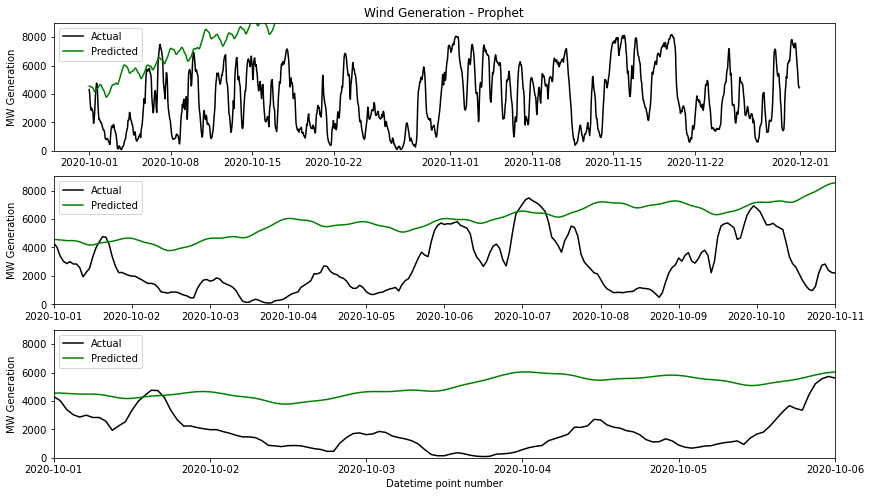

In [10]:
plot = pyplot.figure(figsize=(14,8))

ax1 = plot.add_subplot(311)
ax1.plot_date(x=df_future["ds"], y=df_future["y"], fmt="k-")
ax1.plot_date(x=forecast["ds"], y=forecast["yhat"], fmt="g-")
ax1.set_ylim(0,9000)
pyplot.ylabel('MW Generation')
pyplot.title('Wind Generation - Prophet')
pyplot.gca().legend(('Actual','Predicted'), loc='upper left')

#
ax2 = plot.add_subplot(312)
ax2.plot_date(x=df_future["ds"], y=df_future["y"], fmt="k-")
ax2.plot_date(x=forecast["ds"], y=forecast["yhat"], fmt="g-")
ax2.set_ylim(0,9000)
ax2.set_xlim([datetime.date(2020,10,1), datetime.date(2020,10,11)])
pyplot.ylabel('MW Generation')
pyplot.gca().legend(('Actual','Predicted'), loc='upper left')

#
ax3 = plot.add_subplot(313)
ax3.plot_date(x=df_future["ds"], y=df_future["y"], fmt="k-")
ax3.plot_date(x=forecast["ds"], y=forecast["yhat"], fmt="g-")
ax3.set_ylim(0,9000)
ax3.set_xlim([datetime.date(2020,10,1), datetime.date(2020,10,6)])
pyplot.xlabel('Datetime point number')
pyplot.ylabel('MW Generation')
pyplot.gca().legend(('Actual','Predicted'), loc='upper left')
pyplot.savefig('Prophet_2_Graph.png')